# Exploratory Data Analysis

I start by loading the data into a pandas dataframe. First, I try to pinpoint useless features, and sort others as categorical or continuous variables.

In [1]:
import pandas as pd

In [2]:
df_x = pd.read_csv('data/data_x.csv', index_col='id')
df_y = pd.read_csv('data/data_y.csv', index_col='id')
df = pd.concat([df_y, df_x], axis=1)

In [3]:
df.sort_values(by='id')

,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
0,non functional,0.0,2012-11-13,Tasaf,0,TASAF,33.125828,-5.118154,Mratibu,0,...,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
1,functional,0.0,2011-03-05,Shipo,1978,SHIPO,34.770717,-9.395642,none,0,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
2,functional,0.0,2011-03-27,Lvia,0,LVIA,36.115056,-6.279268,Bombani,0,...,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
3,functional,10.0,2013-06-03,Germany Republi,1639,CES,37.147432,-3.187555,Area 7 Namba 5,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
4,non functional,0.0,2011-03-22,Cmsr,0,CMSR,36.164893,-6.099289,Ezeleda,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74240,functional,0.0,2013-03-22,World Vision,1183,World vision,37.007726,-3.280868,Upendo Primary School,0,...,unknown,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
74242,functional,0.0,2011-04-12,Danida,0,DANIDA,33.724987,-8.940758,Kwa Mvulula,0,...,on failure,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
74243,non functional,0.0,2012-11-13,Ministry Of Water,1188,Hesawa,33.963539,-1.429477,Kwa Wambura Msege,0,...,never pay,soft,good,enough,enough,lake,river/lake,surface,communal standpipe multiple,communal standpipe


59400 data points, 39 dependent variables

In [4]:
df.columns

Index(['status_group', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [5]:
for col in df.columns:
    print(df[col].value_counts(normalize=True), '\n')

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64 

0.0         0.700993
500.0       0.052222
50.0        0.041616
1000.0      0.025051
20.0        0.024630
              ...   
8500.0      0.000017
6300.0      0.000017
220.0       0.000017
138000.0    0.000017
12.0        0.000017
Name: amount_tsh, Length: 98, dtype: float64 

2011-03-15    0.009630
2011-03-17    0.009394
2013-02-03    0.009192
2011-03-14    0.008754
2011-03-16    0.008636
                ...   
2013-12-01    0.000017
2011-09-18    0.000017
2004-07-01    0.000017
2004-04-01    0.000017
2004-06-01    0.000017
Name: date_recorded, Length: 356, dtype: float64 

Government Of Tanzania    0.162898
Danida                    0.055841
Hesawa                    0.039487
Rwssp                     0.024639
World Bank                0.024191
                            ...   
Kilol                     0.000018
Quick Win                 0.

spring                  0.286549
shallow well            0.283232
machine dbh             0.186448
river                   0.161818
rainwater harvesting    0.038636
hand dtw                0.014714
lake                    0.012879
dam                     0.011044
other                   0.003569
unknown                 0.001111
Name: source, dtype: float64 

spring                  0.286549
shallow well            0.283232
borehole                0.201162
river/lake              0.174697
rainwater harvesting    0.038636
dam                     0.011044
other                   0.004680
Name: source_type, dtype: float64 

groundwater    0.770943
surface        0.224377
unknown        0.004680
Name: source_class, dtype: float64 

communal standpipe             0.480168
hand pump                      0.294411
other                          0.107407
communal standpipe multiple    0.102744
improved spring                0.013199
cattle trough                  0.001953
dam                    

Notes about features:
- class imbalance in status_group (dependent variable): 54%-38%-7% split, may need to look into class imbalance options
- amount_tsh: over 70% 0 - an actual value of 0 would indicate no water, so this feature is likely very incorrect and mostly useless - also one extreme outlier of 350000
- date_recorded: over a range of dates from 2002 to 2013, not useful to prediciton
- gps_height: over a third are at exactly zero, with another 2.5% below zero, I'm not sure what to make of this, but the data will likely not be used
- longitude and latitude: the points with 0 longitude match exactly with -2e-8 latitude, neither of which are in Tanzania, but these only take up 3% of the data
- subvillage, region, region_code, district_code, lga, and ward: all seem to refer to location, so not all will be used, likely only one
- num_private: no description given for this data; with 99% 0 value, this is likely useless anyways
- population: nearly 50% of the data at 0 or 1 means this isn't likely factual information
- public_meeting: no information given about this feature
- recorded_by: not useful to prediction
- construction_year: the 35% of values with a 0 are obviously wrong
- payment and payment_type: these features seemt o be exact copies of each other
- water_quality and quality_group: near copies of each other, water_quality is a bit more precise
- quantity and quantity_group: exact copies of each other
- source, source_type, and source_class: near copies of each other, source is a bit more precise
- waterpoint_type and waterpoint_type_group: near copies of each other, waterpoint_type is a bit more precise

In [6]:
target = ['status_group']
to_drop = ['amount_tsh', 'date_recorded', 'gps_height', 'wpt_name', 'num_private', 'public_meeting', 'recorded_by',
           'payment_type', 'extraction_type_group', 'extraction_type_class', 'quality_group', 'quantity_group',
           'management_group', 'source_type', 'source_class', 'waterpoint_type_group']
categorical = ['funder', 'installer', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
               'scheme_management', 'scheme_name', 'permit', 'extraction_type', 'management', 'payment',
               'water_quality', 'quantity', 'source', 'waterpoint_type']
continuous = ['longitude', 'latitude', 'population', 'construction_year']

## Categorical Variables

Now I take a closer look at just the categorical variables. Many of these features have near copies that need to be removed, while others are less than useful without cleaning. I then need to make dummy columns of each of these features.

In [7]:
for col in categorical:
    print(col, df[col].value_counts().count())

funder 1897
installer 2145
basin 9
subvillage 19287
region 21
region_code 27
district_code 20
lga 125
ward 2092
scheme_management 12
scheme_name 2696
permit 2
extraction_type 18
management 12
payment 7
water_quality 8
quantity 5
source 10
waterpoint_type 7


Many of the categoricals variables have way too many categories, as many as 19287. In order to only bother with important features, I remove categories with representation of less than 1% of the sample, changing them to a new "other" category.

In [8]:
categories_to_remove = {}
for col in categorical:
    df_tmp = pd.DataFrame(df[col].value_counts(normalize=True))
    other_categories = list(df_tmp.loc[df_tmp[col]<0.01].index)
    df[col] = df[col].map(lambda x: 'other' if x in other_categories else x)
    categories_to_remove[col] = other_categories

In [9]:
categories_to_remove

{'funder': ['Dwe',
  'Netherlands',
  'Hifab',
  'Adb',
  'Lga',
  'Amref',
  'Fini Water',
  'Oxfam',
  'Wateraid',
  'Rc Church',
  'Isf',
  'Rudep',
  'Mission',
  'Private',
  'Jaica',
  'Roman',
  'Rural Water Supply And Sanitat',
  'Adra',
  'Ces(gmbh)',
  'Jica',
  'Shipo',
  'Wsdp',
  'Rc',
  'Finw',
  'Dh',
  'Ded',
  'Plan Int',
  'Kiliwater',
  'Dmdd',
  'Go',
  'Lawatefuka Water Supply',
  'Oxfarm',
  'Magadini-makiwaru Water',
  'Fw',
  'W.B',
  'Kkkt_makwale',
  'Ces (gmbh)',
  'Wvt',
  'Oikos E.Afrika',
  'Nethalan',
  'Mkinga Distric Coun',
  'Lvia',
  'Concern World Wide',
  'Unhcr',
  'No',
  'Swedish',
  'African',
  'Anglican Church',
  'Community',
  'Is',
  'He',
  'Ki',
  'Ir',
  'Tardo',
  'Snv',
  'Wananchi',
  'Roman Catholic',
  'Wua',
  'Unice',
  'Bsf',
  'Tassaf',
  'Co',
  'Lamp',
  'Dfid',
  'Concern',
  'Muwsa',
  'Villagers',
  'Ru',
  'Village Council',
  'Halmashauri Ya Wilaya Sikonge',
  'Hsw',
  'Germany',
  'Twe',
  'Idc',
  'Tanza',
  'Missi',
  

In [10]:
for col in categorical:
    print(df[col].value_counts(normalize=True), '\n', df[col].value_counts(normalize=True).count(), '\n')

other                     0.483081
Government Of Tanzania    0.162898
Danida                    0.055841
Hesawa                    0.039487
Rwssp                     0.024639
World Bank                0.024191
Kkkt                      0.023079
World Vision              0.022344
Unicef                    0.018955
Tasaf                     0.015727
District Council          0.015117
Dhv                       0.014866
Private Individual        0.014812
Dwsp                      0.014543
0                         0.013933
Norad                     0.013718
Germany Republi           0.010939
Tcrs                      0.010795
Ministry Of Water         0.010580
Water                     0.010455
Name: funder, dtype: float64 
 20 

other                 0.515705
DWE                   0.312171
Government            0.032738
RWE                   0.021634
Commu                 0.019015
DANIDA                0.018836
KKKT                  0.016109
Hesawa                0.015069
0               

With a smaller number of categories per feature, I can now take a closer look at them and see that some of them already have categories that don't correlate with an actual value. Those will be changed to this new "other" category.

Of the geographical locations, "region" seems most useful, so "subvillage", "region_code", "district_code", "lga", and "ward" will be dropped entirely. The "scheme_name" feature has nearly 90% of its values as "other", so it will also be dropped.

In [11]:
df['funder'] = df[col].map(lambda x: 'other' if x=='0' else x)
df['installer'] = df[col].map(lambda x: 'other' if x=='0' else x)
df['scheme_management'] = df[col].map(lambda x: 'other' if x=='Other' else x)

In [12]:
for item in ['subvillage', 'region_code', 'district_code', 'lga', 'ward', 'scheme_name']:
    to_drop.append(item)
    categorical.remove(item)

In [13]:
corr = pd.get_dummies(df.drop(to_drop+target , axis=1)).corr()
df_corr=corr.abs().stack().reset_index().sort_values(0, ascending=False)
df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))
df_corr.set_index(['pairs'], inplace = True)
df_corr.drop(columns=['level_1', 'level_0'], inplace = True)
df_corr.columns = ['cc']
df_corr.drop_duplicates(inplace=True)
df_corr[(df_corr.cc>.75) & (df_corr.cc <1)]

,cc
pairs,
"(permit_False, permit_True)",0.888369


Most models I'm going to run don't require uncorrelated data, but with so many features, I still want to trim the extra where I can, to save time in running the models and make the results easier to interpret.

In [14]:
df.drop(to_drop+target , axis=1).columns

Index(['funder', 'installer', 'longitude', 'latitude', 'basin', 'region',
       'population', 'scheme_management', 'permit', 'construction_year',
       'extraction_type', 'management', 'payment', 'water_quality', 'quantity',
       'source', 'waterpoint_type'],
      dtype='object')

In [15]:
df_dummies = pd.get_dummies(df.drop(to_drop+target, axis=1))
df_dummies.sort_values(by='id')

,longitude,latitude,population,construction_year,funder_communal standpipe,funder_communal standpipe multiple,funder_hand pump,funder_improved spring,funder_other,installer_communal standpipe,...,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
id,,,,,,,,,,,,,,,,,,,,,
0,33.125828,-5.118154,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,34.770717,-9.395642,20,2008,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,36.115056,-6.279268,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,37.147432,-3.187555,25,1999,1,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
4,36.164893,-6.099289,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74240,37.007726,-3.280868,350,2012,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
74242,33.724987,-8.940758,0,0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
74243,33.963539,-1.429477,95,1983,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Finally, I make dummy variables of the categorical features, ending with 100 variables.

## Continuous Variables

Here I take a closer look at the continuous variables. The biggest problem is with missing values in important variables, which will be dealt with by KNN imputing.

In [16]:
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

In [17]:
df_dummies[continuous]

,longitude,latitude,population,construction_year
id,,,,
69572,34.938093,-9.856322,109,1999
8776,34.698766,-2.147466,280,2010
34310,37.460664,-3.821329,250,2009
67743,38.486161,-11.155298,58,1986
19728,31.130847,-1.825359,0,0
...,...,...,...,...
60739,37.169807,-3.253847,125,1999
27263,35.249991,-9.070629,56,1996
37057,34.017087,-8.750434,0,0


In [18]:
df_dummies[continuous].describe()

,longitude,latitude,population,construction_year
count,59400.000000,5.940000e+04,59400.000000,59400.000000
mean,34.077427,-5.706033e+00,179.909983,1300.652475
std,6.567432,2.946019e+00,471.482176,951.620547
min,0.000000,-1.164944e+01,0.000000,0.000000
25%,33.090347,-8.540621e+00,0.000000,0.000000
50%,34.908743,-5.021597e+00,25.000000,1986.000000
75%,37.178387,-3.326156e+00,215.000000,2004.000000
max,40.345193,-2.000000e-08,30500.000000,2013.000000


In [19]:
for col in df_dummies[continuous].columns:
    print(df_dummies[col].value_counts(normalize=True), '\n')

0.000000     0.030505
37.540901    0.000034
33.010510    0.000034
39.093484    0.000034
32.972719    0.000034
               ...   
37.579803    0.000017
33.196490    0.000017
34.017119    0.000017
33.788326    0.000017
30.163579    0.000017
Name: longitude, Length: 57516, dtype: float64 

-2.000000e-08    0.030505
-6.985842e+00    0.000034
-3.797579e+00    0.000034
-6.981884e+00    0.000034
-7.104625e+00    0.000034
                   ...   
-5.726001e+00    0.000017
-9.646831e+00    0.000017
-8.124530e+00    0.000017
-2.535985e+00    0.000017
-2.598965e+00    0.000017
Name: latitude, Length: 57517, dtype: float64 

0       0.359949
1       0.118266
200     0.032660
150     0.031852
250     0.028300
          ...   
3241    0.000017
1960    0.000017
1685    0.000017
2248    0.000017
1439    0.000017
Name: population, Length: 1049, dtype: float64 

0       0.348636
2010    0.044529
2008    0.043990
2009    0.042643
2000    0.035202
2007    0.026717
2006    0.024764
2003    0.021650
201

All values need to be scaled in order to let KNN imputing work, but I don't want the scaling to be impacted by the missing variables, which are often 0. So, I need to replace all missing values with nan before applying a min-max scaler to every item in the dataframe.

In [20]:
df_dummies['longitude'].replace(0.0, np.NaN, inplace=True)
df_dummies['latitude'].replace(-2.000000e-08, np.NaN, inplace=True)
df_dummies['population'].replace(0, np.NaN, inplace=True)
df_dummies['construction_year'].replace(0, np.NaN, inplace=True)

In [21]:
df_dummies.isna().sum()

longitude                                       1812
latitude                                        1812
population                                     21381
construction_year                              20709
funder_communal standpipe                          0
                                               ...  
waterpoint_type_communal standpipe                 0
waterpoint_type_communal standpipe multiple        0
waterpoint_type_hand pump                          0
waterpoint_type_improved spring                    0
waterpoint_type_other                              0
Length: 100, dtype: int64

In [22]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_dummies), index=df_dummies.index, columns=df_dummies.columns)
df_scaled.sort_values(by='id')

,longitude,latitude,population,construction_year,funder_communal standpipe,funder_communal standpipe multiple,funder_hand pump,funder_improved spring,funder_other,installer_communal standpipe,...,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
id,,,,,,,,,,,,,,,,,,,,,
0,0.327685,0.613210,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.480868,0.211605,0.000623,0.905660,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.606062,0.504195,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.702203,0.794470,0.000787,0.735849,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.610703,0.521093,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74240,0.689193,0.785709,0.011443,0.981132,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
74242,0.383483,0.254313,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
74243,0.405698,0.959533,0.003082,0.433962,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Finally, I call the KNN imputer on the continuous data. I use the defaults of 5 neighbors and uniform weights.

In [23]:
imputer = KNNImputer()
df_imputed = pd.DataFrame(imputer.fit_transform(df_scaled), index=df_scaled.index, columns=df_scaled.columns)

In [24]:
df_imputed[continuous].describe()

,longitude,latitude,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000
mean,0.511598,0.549665,0.011306,0.703045
std,0.240618,0.264280,0.017296,0.212365
min,0.000000,0.000000,0.000000,0.000000
25%,0.340404,0.291881,0.002328,0.566038
50%,0.493859,0.622183,0.007508,0.754717
75%,0.705097,0.781079,0.014066,0.879245
max,1.000000,1.000000,1.000000,1.000000


In [25]:
df_imputed.isna().sum()

longitude                                      0
latitude                                       0
population                                     0
construction_year                              0
funder_communal standpipe                      0
                                              ..
waterpoint_type_communal standpipe             0
waterpoint_type_communal standpipe multiple    0
waterpoint_type_hand pump                      0
waterpoint_type_improved spring                0
waterpoint_type_other                          0
Length: 100, dtype: int64

In [26]:
df_imputed.sort_values(by='id')

,longitude,latitude,population,construction_year,funder_communal standpipe,funder_communal standpipe multiple,funder_hand pump,funder_improved spring,funder_other,installer_communal standpipe,...,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
id,,,,,,,,,,,,,,,,,,,,,
0,0.327685,0.613210,0.022735,0.849057,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.480868,0.211605,0.000623,0.905660,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.606062,0.504195,0.008512,0.871698,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.702203,0.794470,0.000787,0.735849,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.610703,0.521093,0.006531,0.860377,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74240,0.689193,0.785709,0.011443,0.981132,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
74242,0.383483,0.254313,0.002525,0.377358,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
74243,0.405698,0.959533,0.003082,0.433962,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


I now have culled and cleaned the X-data into a useable format. I combine it with the y-data to complete the dataset, which I save as a csv so I can start the modelling process.

In [27]:
df_cleaned = pd.concat([df_y, df_imputed], axis=1)
df_cleaned.sort_values(by='id')

,status_group,longitude,latitude,population,construction_year,funder_communal standpipe,funder_communal standpipe multiple,funder_hand pump,funder_improved spring,funder_other,...,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
id,,,,,,,,,,,,,,,,,,,,,
0,non functional,0.327685,0.613210,0.022735,0.849057,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,functional,0.480868,0.211605,0.000623,0.905660,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,functional,0.606062,0.504195,0.008512,0.871698,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,functional,0.702203,0.794470,0.000787,0.735849,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,non functional,0.610703,0.521093,0.006531,0.860377,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74240,functional,0.689193,0.785709,0.011443,0.981132,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
74242,functional,0.383483,0.254313,0.002525,0.377358,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
74243,non functional,0.405698,0.959533,0.003082,0.433962,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [28]:
df_cleaned.to_csv('data/cleaned_data.csv')

## Visualizations

In [29]:
import matplotlib.pyplot as plt

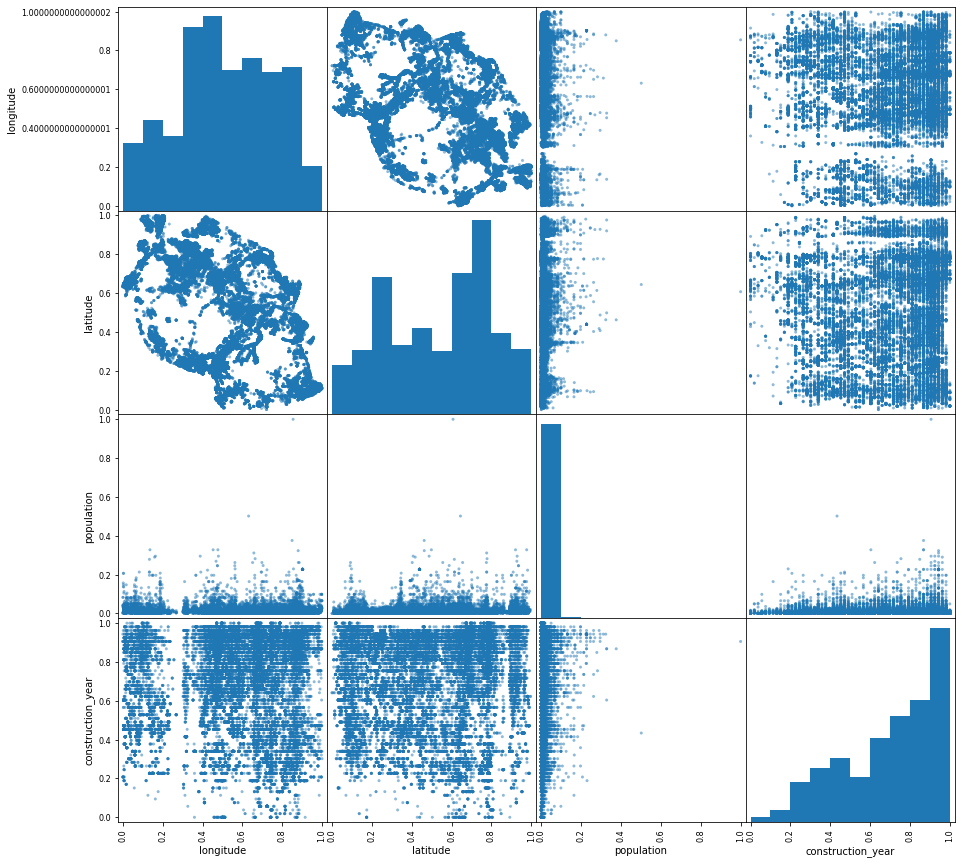

In [30]:
pd.plotting.scatter_matrix(df_scaled[continuous], figsize=(15, 15))
plt.show()

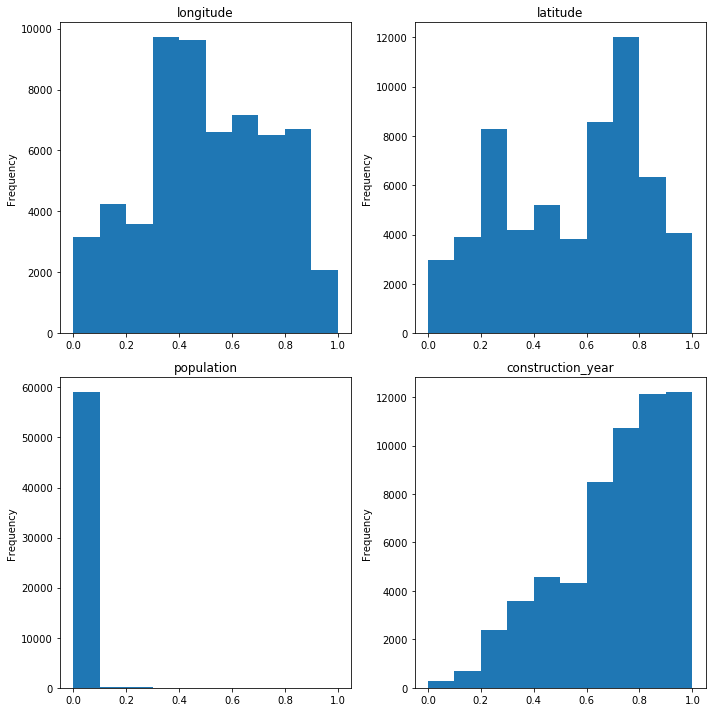

In [31]:
fig = plt.figure(figsize=(10, 10))
for i, col in enumerate(continuous):
    ax = plt.subplot(2, 2, i+1)
    df_cleaned[col].plot(kind='hist', ax=ax, title=col)
plt.tight_layout()
plt.savefig(f'visualizations/histograms.png')
plt.show()

## Submission Data

In order to make use of this data for the contest, I need to do the same thing to the submission X data as I did to my test data here.

In [32]:
X_submission = pd.read_csv('data/submission_x.csv', index_col='id')
X_submission.sort_values(by='id')

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
10,0.0,2011-03-13,Roman Catholic,197,DWE,38.790694,-5.113207,Nairobi,0,Pangani,...,never pay,soft,good,seasonal,seasonal,spring,spring,groundwater,communal standpipe,communal standpipe
13,0.0,2013-02-08,Tasaf,803,TASAF,36.905545,-10.765602,none,0,Ruvuma / Southern Coast,...,never pay,soft,good,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump
14,0.0,2013-03-27,Government Of Tanzania,1804,DWE,36.570357,-3.251609,Sukumeni,0,Pangani,...,never pay,soft,good,enough,enough,spring,spring,groundwater,cattle trough,cattle trough
29,0.0,2011-04-11,Water,0,Commu,35.882325,-6.067613,Kwa Molen,0,Wami / Ruvu,...,per bucket,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
32,0.0,2011-07-27,Kyela Council,0,DWE,33.886334,-9.457260,Kwa Albert Mwaikombe,0,Lake Nyasa,...,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74241,0.0,2011-03-15,Government Of Tanzania,0,Gover,36.563607,-6.688495,Kwamatonya,0,Wami / Ruvu,...,per bucket,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
74244,0.0,2013-02-14,Kibo Brewaries,695,District Council,37.559881,-3.498092,Sokoni,0,Pangani,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
74245,0.0,2013-03-04,Government Of Tanzania,1420,Government,37.581890,-3.284912,Kwa Elimisi Urio,0,Pangani,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [33]:
for col, other_categories in categories_to_remove.items():
    X_submission[col] = X_submission[col].map(lambda x: 'other' if x in other_categories else x)
X_submission['funder'] = X_submission[col].map(lambda x: 'other' if x =='0' else x)
X_submission['installer'] = X_submission[col].map(lambda x: 'other' if x =='0' else x)
X_submission['scheme_management'] = X_submission[col].map(lambda x: 'other' if x =='Other' else x)

In [34]:
X_submission_dummies = pd.get_dummies(X_submission.drop(to_drop, axis=1))
X_submission_dummies.sort_values(by='id')

,longitude,latitude,population,construction_year,funder_communal standpipe,funder_communal standpipe multiple,funder_hand pump,funder_improved spring,funder_other,installer_communal standpipe,...,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
id,,,,,,,,,,,,,,,,,,,,,
10,38.790694,-5.113207,250,1999,1,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
13,36.905545,-10.765602,1,2009,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14,36.570357,-3.251609,200,1980,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
29,35.882325,-6.067613,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32,33.886334,-9.457260,0,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74241,36.563607,-6.688495,0,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
74244,37.559881,-3.498092,360,1993,1,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
74245,37.581890,-3.284912,1,1970,1,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0


In [35]:
X_submission_dummies['longitude'].replace(0.0,np.NaN, inplace=True)
X_submission_dummies['latitude'].replace(-2.000000e-08,np.NaN, inplace=True)
X_submission_dummies['population'].replace(0,np.NaN, inplace=True)
X_submission_dummies['construction_year'].replace(0,np.NaN, inplace=True)
X_submission_scaled = pd.DataFrame(scaler.transform(X_submission_dummies), index=X_submission_dummies.index, columns=X_submission_dummies.columns)
X_submission_scaled.sort_values(by='id')

,longitude,latitude,population,construction_year,funder_communal standpipe,funder_communal standpipe multiple,funder_hand pump,funder_improved spring,funder_other,installer_communal standpipe,...,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
id,,,,,,,,,,,,,,,,,,,,,
10,0.855235,0.613675,0.008164,0.735849,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
13,0.679677,0.082982,0.000000,0.924528,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14,0.648462,0.788457,0.006525,0.377358,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
29,0.584388,0.524067,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
32,0.398508,0.205820,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74241,0.647834,0.465774,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
74244,0.740613,0.765315,0.011771,0.622642,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
74245,0.742663,0.785330,0.000000,0.188679,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [36]:
X_submission_imputed = pd.DataFrame(imputer.transform(X_submission_scaled), index=X_submission_scaled.index, columns=X_submission_scaled.columns)
X_submission_imputed.sort_values(by='id')

,longitude,latitude,population,construction_year,funder_communal standpipe,funder_communal standpipe multiple,funder_hand pump,funder_improved spring,funder_other,installer_communal standpipe,...,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
id,,,,,,,,,,,,,,,,,,,,,
10,0.855235,0.613675,0.008164,0.735849,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
13,0.679677,0.082982,0.000000,0.924528,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14,0.648462,0.788457,0.006525,0.377358,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
29,0.584388,0.524067,0.016689,0.494340,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
32,0.398508,0.205820,0.001266,0.445283,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74241,0.647834,0.465774,0.007508,0.656604,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
74244,0.740613,0.765315,0.011771,0.622642,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
74245,0.742663,0.785330,0.000000,0.188679,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [37]:
X_submission_imputed.to_csv('data/X_submission_cleaned.csv')